In [3]:
import os
import sys
import glob
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import pydicom
from PIL import Image

In [4]:
PIL_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.tif', '.tiff']
ALL_EXTENSIONS = PIL_EXTENSIONS + ['.dcm']

In [5]:
# Given a filename, use the extension to determine if it is an image
def is_img_ext(filename: str) -> bool:
    return os.path.splitext(filename)[1].lower() in ALL_EXTENSIONS

In [6]:
# Given a path and optional glob string, return the list of files in
# the directory. Also, optionally filter by image extension.
def get_file_list(path: str, glob_str: str = "*.*", filter_images=True) -> list:
    if os.path.isfile(path):
        if glob_str:
            print('Warning: glob string ignored for single file input')
        return [path]

    if not path.endswith('/'):
        path += '/'
    filelist = glob.glob(path + glob_str)

    if filter_images:
        filelist = [file for file in filelist if is_img_ext(file)]

    return filelist

In [7]:
def get_image(filename: str):
    ext = os.path.splitext(filename)[1].lower()
    color_map = plt.cm.bone
    if ext == '.dcm':
        dicom_data = pydicom.read_file(filename)
        # DEBUG
        print(dicom_data)
        im = dicom_data.pixel_array
        print(dicom_data.PhotometricInterpretation)
        if dicom_data.PhotometricInterpretation == 'MONOCHROME1':
            color_map = plt.cm.gray_r
        elif dicom_data.PhotometricInterpretation == 'YBR_FULL_422':
            im = convert_color_space(im, "YBR_FULL_422", "RGB")
        im_shape = im.shape
    elif ext in PIL_EXTENSIONS:
        im = Image.open(filename)
        im_shape = im.size
    else:
        print(f"file not in {PIL_EXTENSIONS}")

    return im, im_shape, color_map

In [8]:
def get_inputs(path=None, glob_str=None):
    if not path:
        path = input("Enter full image directory path: ")
    if not glob_str:
        glob_str = input("Enter glob string: ")

    return path, glob_str

In [16]:
#def display_batch(filelist: list, grid_shape: tuple, offset=0):
def display_batch(filelist: list, grid_shape: tuple):
    #if not filelist:
    #    get_inputs(.......)
    
#    grid_size = grid_shape[0] * grid_shape[1]
    fsize = (grid_shape[1] * 6, grid_shape[0] * 4)
    fig, axs = plt.subplots(grid_shape[0], grid_shape[1], figsize=fsize)
#    for ax, file in zip(axs, filelist[offset:grid_size + offset]):
    for ax, file in zip(axs, filelist):
        basename = os.path.basename(file)
        img, im_shape, color_map = get_image(file)
        print(f'im_shape = {im_shape}')
        print(f'img.flags = \n{img.flags}')
        print(f'type(img) = {type(img)}')
        print(f'img = \n{img}')
        ax.set_title(basename)
        ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.set_xlabel(im_shape[1])
        ax.set_ylabel(im_shape[0])
        ax.imshow(img, cmap=color_map)
        
    plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x01\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9125.9.0.319805827.3819678904.1114623080
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.5.3
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_353'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 594
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'POST_PROCESSED', '', '', '', '', '', '100000']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SO

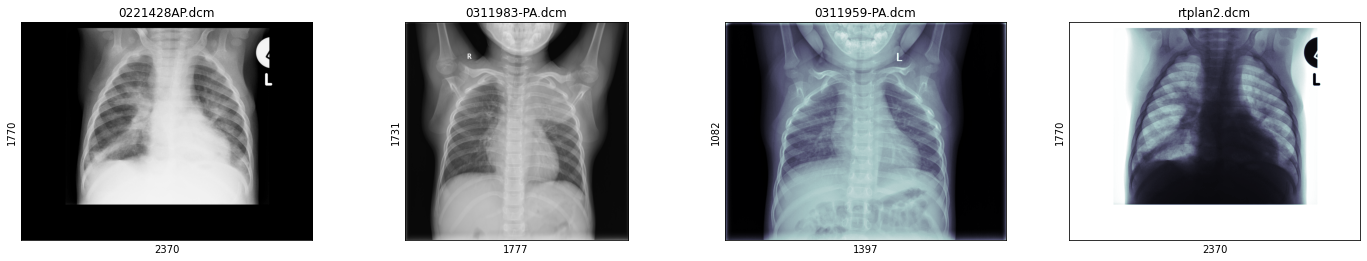

In [17]:
index = 0
#path='/slurm_storage/mbopf/data/PedTB/renamed'
#glob_str='11*.dcm'
#glob_str='05*.dcm'
path='/slurm_storage/mbopf/projects/mwb/imaging_utils'
glob_str='*.dcm'
#path, glob_str = get_inputs()
grid_shape = (1,4)
grid_size = grid_shape[0] * grid_shape[1] 
full_list = get_file_list(path, glob_str, filter_images=False)
#filelist = get_file_list(path) # Defaults of all files and image types
display_batch(full_list[index:index+grid_size], grid_shape)

index: 4; len(full_list): 6
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 186
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10008.5.1.4.1.1.7.0.0.0
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.25.219181047665313190039273556003903477538
(0002, 0013) Implementation Version Name         SH: 'MIPAV--NIH'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10008.5.1.4.1.1.7.0.0.0
(0008, 0020) Study Date                          DA: '20150515'
(0008, 0021) Series Date                         DA: '20150515'
(0008, 0030) Study Time                

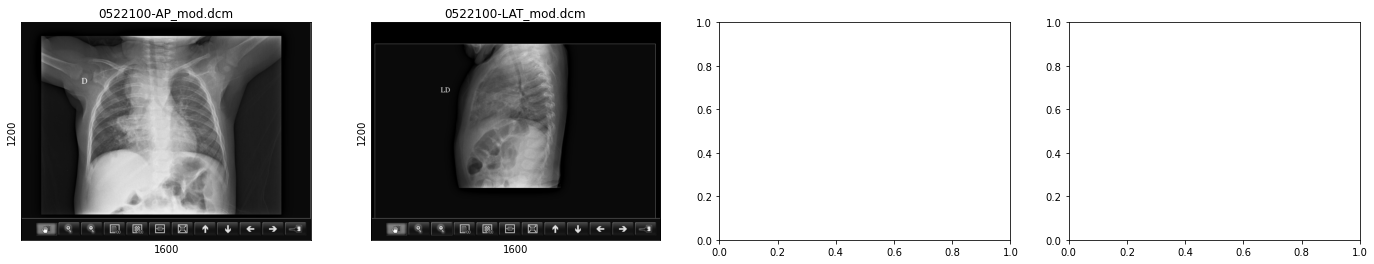

In [11]:
index += grid_size
print(f'index: {index}; len(full_list): {len(full_list)}')
if index < len(full_list):
    display_batch(full_list[index:index+grid_size], grid_shape)
else:
    print(f'index: {index}; len(full_list): {len(full_list)}')